In [589]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
#Load Titanic dataset
titanic = sns.load_dataset("titanic")

In [591]:
# Data Cleaning & Data Pre-processing

In [593]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [595]:
# Get a summary of the DataFrame
titanic.info()

# Get descriptive statistics specifically for categorical columns
titanic.describe(include='category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


### Short explains:
I saw in Titanic dataset: columns as sex, embarked, pclass, sibsp, parch, and even survived are discrete groups, not continuous numbers.

For example: sex: male / female; pclass: 1 / 2 / 3; embarked: S / C / Q; survived: 0 / 1

-> Converting them to category explicitly informs pandas and machine learning tools that these are qualitative variables — to be treated differently from numerical ones like age or fare.

In [598]:
# Function to Convert Features to Categorical Type 
categorical_features = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']
def convert_to_categorical(titanic, features):
    for feature in features:
        if feature in titanic.columns:
            titanic[feature] = titanic[feature].astype('category')
convert_to_categorical(titanic, categorical_features)
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    category
 5   parch        891 non-null    category
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(8), float64(2), object(3)
memory usage: 45.3+ KB
None


In [600]:
# Get a summary of the DataFrame, including data types and non-null counts
titanic.info()

# Get descriptive statistics specifically for categorical columns
titanic.describe(include='category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    category
 5   parch        891 non-null    category
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(8), float64(2), object(3)
memory usage: 45.3+ KB


,survived,pclass,sex,sibsp,parch,embarked,class,deck
count,891,891,891,891,891,889,891,203
unique,2,3,2,7,7,3,3,7
top,0,3,male,0,0,S,Third,C
freq,549,491,577,608,678,644,491,59


In [602]:
# Drop duplicate columns in meaning

columns_to_drop = ['alive', 'alone', 'deck', 'who', 'adult_male', 'embark_town', 'class']
df = titanic.drop(columns=columns_to_drop)
df.shape

(891, 8)

In [604]:
df.describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Catch:
- Age:
75% of our data set is under 38 -> young population trend
mean > median (29.6 > 28) -> right skew, some higher age may have slightly pulled the average high. (maybe got outlier here)

- fare (considering log transformation)
mean > median, heavily right-skewed that is a huge distance, suggesting extremely outliers, some passengers pay for very high tickets 

In [607]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [609]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [611]:
# Impute (fill) the missing 
#df['age'] = df['age'].fillna(df['age'].median())
df ['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

## Short explanation:
I don't think we should impute the missing 'age' values because nearly one-fourth of the dataset is missing. Filling them with a single value (like the median) could distort the age distribution and make the survival analysis for that age group unreliable.


In [614]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

# Exploratory Data Analysis (EDA)

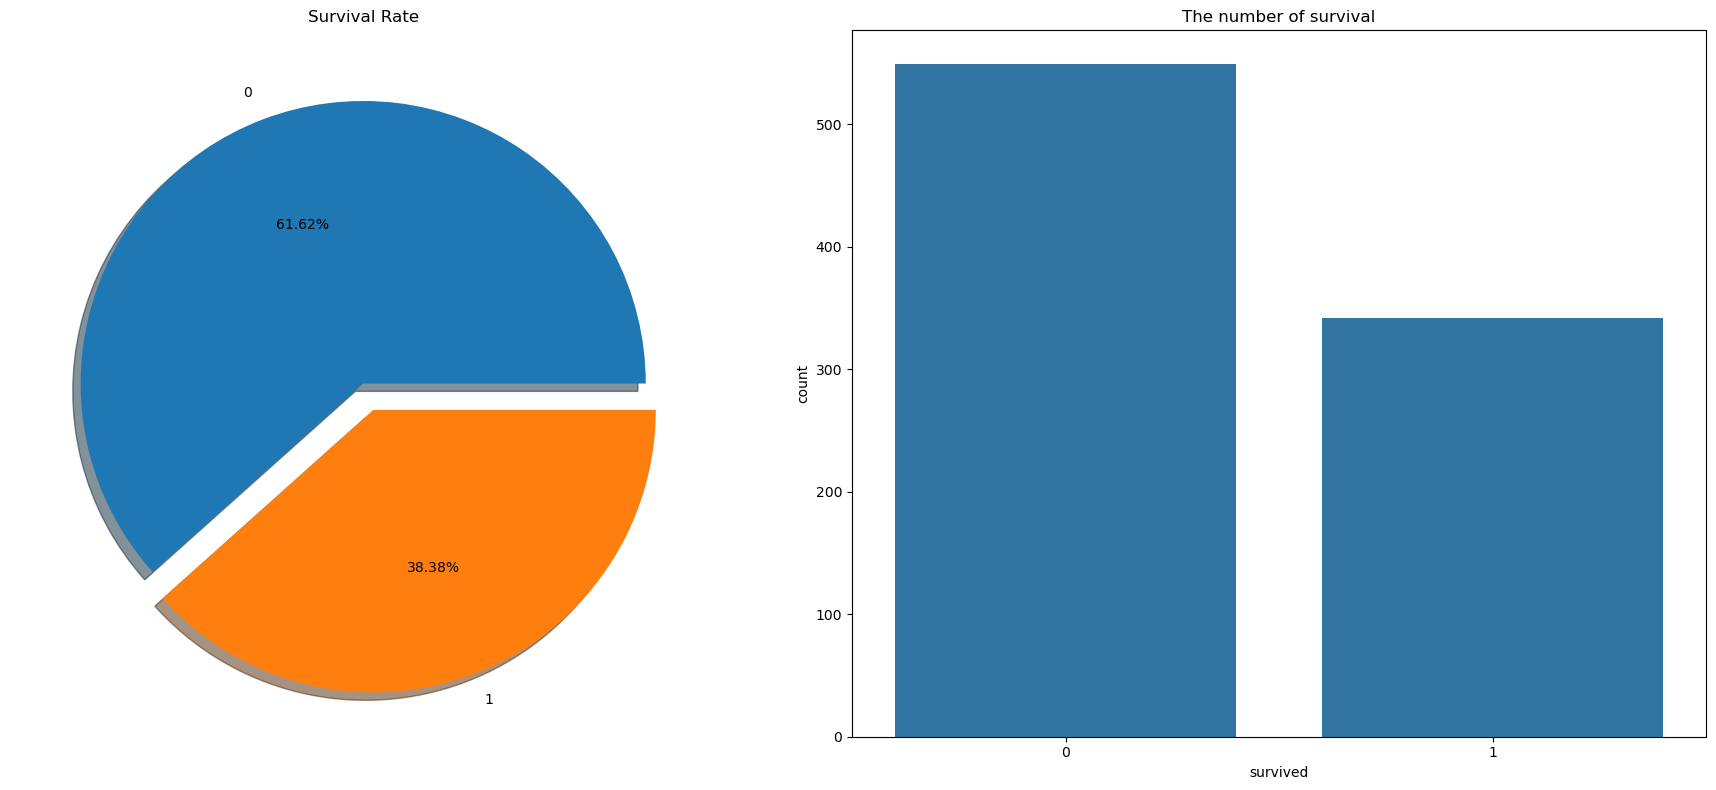

In [617]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    ax=ax[0],
    autopct='%.2f%%',
    shadow=True
)
ax[0].set_title('Survival Rate')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='survived', data=df, ax=ax[1])
ax[1].set_title('The number of survival')

plt.tight_layout()
plt.show()

This means that fewer than 4 out of 10 passengers survived, showing a strong imbalance between the two outcomes.

Historical context:
The Titanic had a limited number of lifeboats, and evacuation procedures favored certain groups (e.g., women and children first). This explains the low overall survival rate.

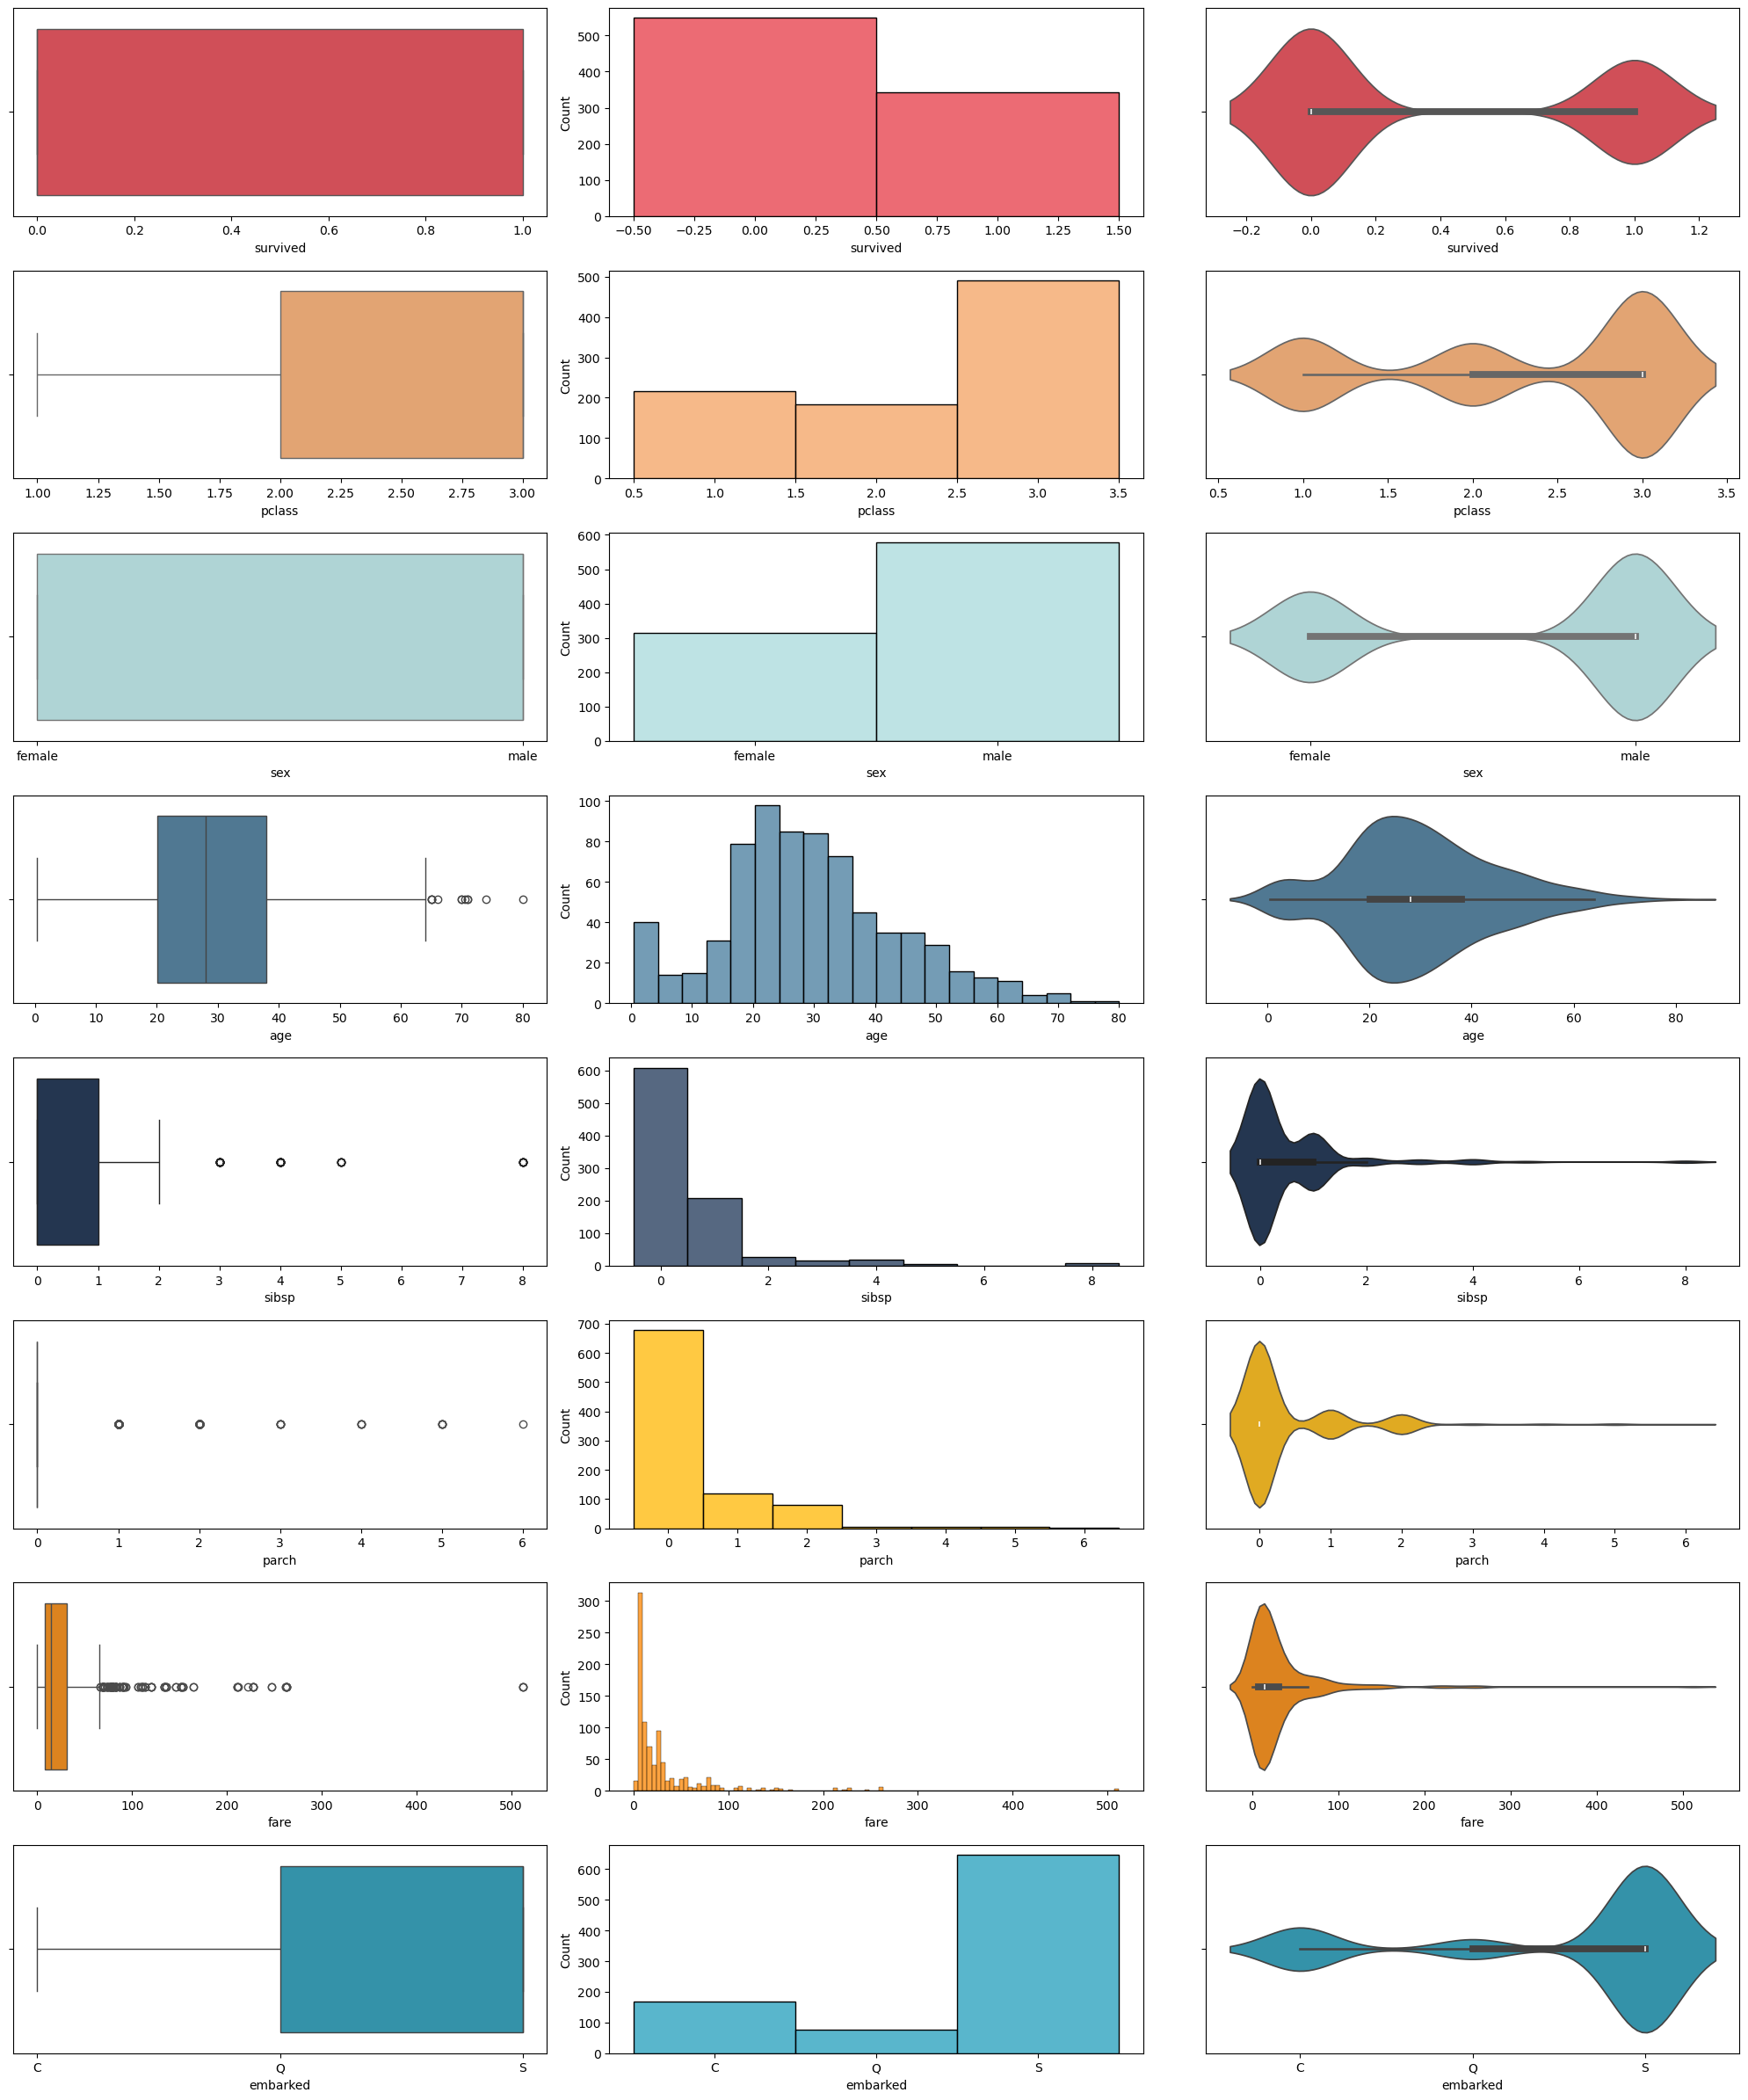

In [620]:
num_vars = len(df.columns)
f, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(20, num_vars*3))
if num_vars == 1:
    axes = axes.reshape(1, 3)

colors = ["#E63946", "#F4A261", "#A8DADC", "#457B9D", "#1D3557",
          "#FFB703", "#FB8500", "#219EBC", "#8ECAE6", "#8338EC", "#FF006E"]

for count, var in enumerate(df.columns):
    color = colors[count % len(colors)]  
    sb.boxplot(data=df[var], orient="h", color=color, ax=axes[count,0])
    sb.histplot(data=df[var], color=color, ax=axes[count,1])
    sb.violinplot(data=df[var], orient="h", color=color, ax=axes[count,2])

plt.tight_layout()
plt.show()


# General Overview of EDA
1. Distribution of Key Variables

The charts (boxplots, histograms, and violin plots) show how each variable in the dataset is distributed:

Survived → binary (0 or 1), confirming a class imbalance (more deaths than survivors).

Pclass → skewed toward class 3, meaning most passengers were in the lowest class.

Sex → roughly imbalanced between male and female, though highly more males.

Age → right-skewed distribution; most passengers were between 20–40 years old, with some elderly outliers (70–80).

SibSp and Parch → highly right-skewed; most passengers traveled alone (0 siblings/spouses and 0 parents/children).

Fare → very right-skewed, indicating a few passengers paid extremely high ticket prices.

Embarked → majority boarded at Southampton (S).

2. Outliers and Skewness

Outliers: clearly visible in Age and Fare boxplots — especially high fares (>400).

Skewness:

Fare and Age are positively skewed, suggesting a transformation (like log(fare)) could help modeling.

SibSp and Parch have many zeros, typical for discrete count features.

3. Relationship to Data Quality

These plots confirm that:

The dataset has a mix of categorical and continuous variables,

Several features (like fare and age) need normalization or binning,

Outliers and missing values (e.g., in age and embarked) must be handled carefully before modeling.

## First Eyes:

Demographics: Most Titanic passengers were young adults and male.

Socioeconomic factor: The majority were third-class travelers, showing a clear social skew.

Fare inequality: Ticket prices varied dramatically — another signal of class-based survival differences.

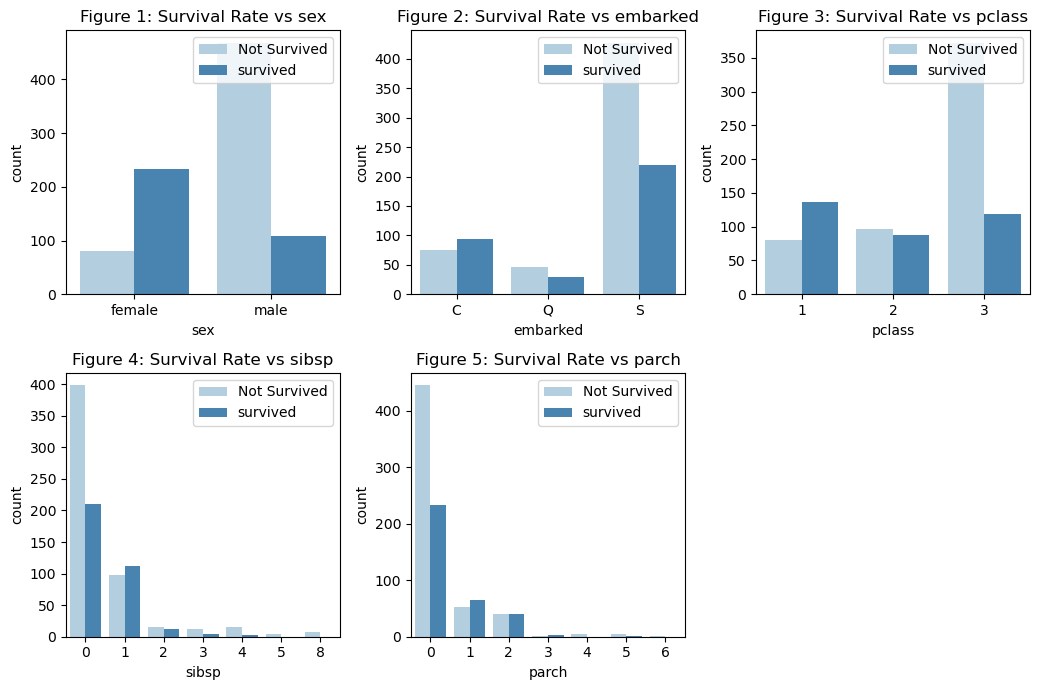

In [622]:
# Survival rate by characterised 

cols = ['sex', 'embarked', 'pclass', 'sibsp', 'parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=df, x=cols[i], hue='survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

## Insight: Survival Rate by Categorical and Family-related Features
1. Survival Rate by Sex

Females had a much higher survival rate than males.
Most women survived, while the majority of men did not.

This supports the historical principle of “women and children first.”

Interpretation:
Gender was one of the strongest predictors of survival — being female significantly increased the chance of survival.

2. Survival Rate by Embarked Port

Passengers who boarded at Cherbourg (C) had a higher survival rate.

Those who boarded at Southampton (S) had the lowest.

Queenstown (Q) passengers had mixed outcomes but fewer survivors overall.

Interpretation:
Embarkation point may reflect economic and social differences — passengers from Cherbourg were often wealthier and likely had better cabins or access to lifeboats.

3. Survival Rate by Passenger Class (Pclass)

First-class passengers (Pclass 1) had the highest survival rate.

Third-class passengers (Pclass 3) had the lowest.

Interpretation:
Ticket class was strongly related to survival, as higher-class cabins were closer to deck level and received priority during evacuation.

4. Survival Rate by Siblings/Spouses (SibSp)

Passengers traveling with 1–2 siblings/spouses had slightly better survival chances.

Those traveling alone (0) or with large families (≥3) were less likely to survive.

Interpretation:
Having close companions may have helped coordination during evacuation, while large groups faced difficulty escaping together.

5. Survival Rate by Parents/Children (Parch)

Passengers with 1–2 parents/children showed higher survival rates than those with none or large families.

Very large family groups (≥3) had almost no survivors.

Interpretation:
Family connection provided some advantage — parents may have prioritized children, but overcrowded family units faced lower rescue chances.

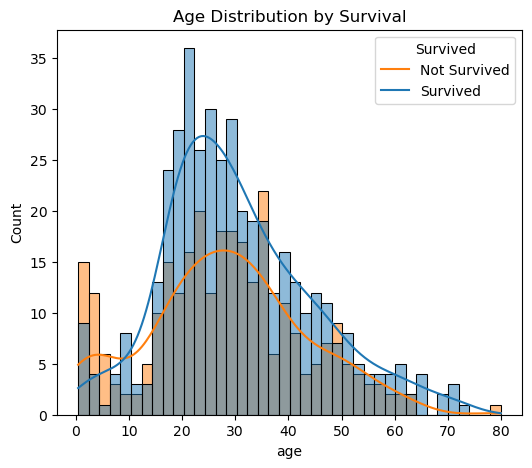

In [626]:
# Age Distribution by Survival 
plt.figure(figsize=(6, 5)) 
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=40) 
plt.title('Age Distribution by Survival') 
plt.legend(title='Survived', labels=['Not Survived', 'Survived']) 
plt.show()

# Insight: Age Distribution by Survival
Observation:

Most passengers were between 20–40 years old, with a visible concentration around age 25–30.
Children (0–10 years old) show a relatively higher survival rate.
The elderly (above 60) were few in number and had very low survival rates.

Interpretation:

The distribution curves show that younger passengers, especially children, were more likely to survive.
The peak for survivors is slightly lower (around age 25) than for non-survivors (around age 30–35), indicating that age influenced survival, though not as strongly as gender or class.
This pattern aligns with the “women and children first” evacuation policy during the disaster.

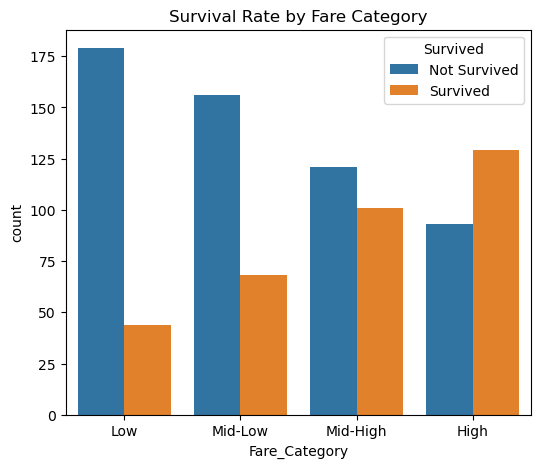

In [629]:
df['Fare_Category'] = pd.qcut(df['fare'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Plot the new categorical 'Fare_Category' feature vs. Survival
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Fare_Category', hue='survived')
plt.title('Survival Rate by Fare Category')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Insight: Survival Rate by Fare Category
Observation:
Passengers in the Low and Mid-Low fare categories had the highest number of deaths.
As fare levels increased, the proportion of survivors rose noticeably.
In the High Fare group, the number of survivors exceeded non-survivors.

Interpretation:
Higher fares correspond to higher survival chances — this suggests that wealthier passengers (who could afford expensive tickets) were in first-class cabins, located closer to the deck and lifeboats.
Lower-fare passengers (mostly third-class) were located in lower sections of the ship, which were harder to access during evacuation.
This pattern highlights a clear social inequality in survival outcomes on the Titanic.

In [632]:
# Data Transformation

In [634]:
# Label Encoding (or Manual Numeric Mapping)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})

df['embarked'] = df['embarked'].map({'C': 0, 'S': 1, 'Q': 2})

df['Fare_Category'] = df['Fare_Category'].map({'Low': 0, 'Mid-Low': 1, 'Mid-High': 2, 'High': 3})

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Fare_Category
0,0,3,0,22.0,1,0,7.2500,1,0
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,1,1
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [636]:
# Feature Selection

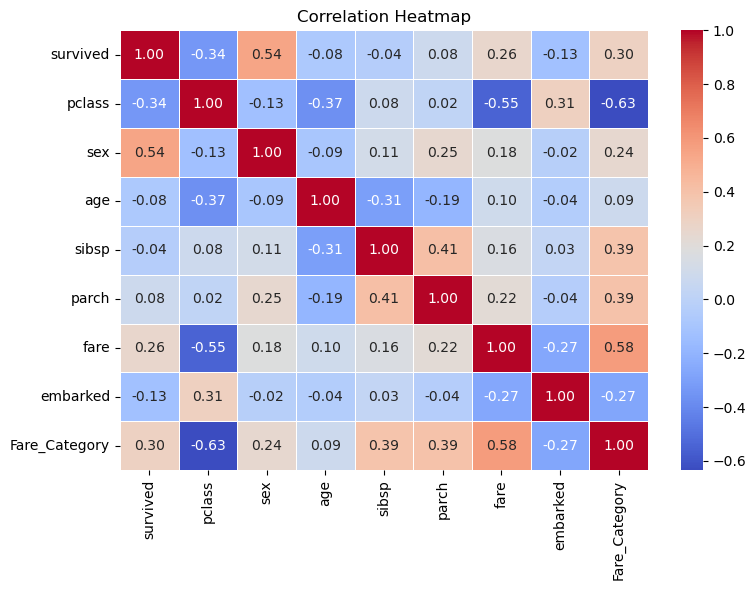

In [638]:
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## Key Observations

Survival (survived) shows:

A positive correlation with sex (0.54) → females were more likely to survive.

A negative correlation with pclass (-0.34) → higher-class passengers had better survival chances.

A positive but weaker correlation with fare (0.26) and Fare_Category (0.30) → passengers who paid higher fares tended to survive more often.

Fare and Pclass have a strong negative correlation (-0.55), confirming that first-class passengers paid higher ticket prices.

SibSp and Parch show a moderate positive correlation (0.41) — larger family groups often traveled together.

Age has very weak correlation with most features, suggesting age alone was not a strong determinant of survival.

## Interpretation

The heatmap highlights that gender, class, and fare are the most influential variables related to survival.
Passengers who were female, paid higher fares, and belonged to higher classes were significantly more likely to survive.
Other variables like age or embarkation point had little direct impact, though they may contribute indirectly when combined with social or economic factors.

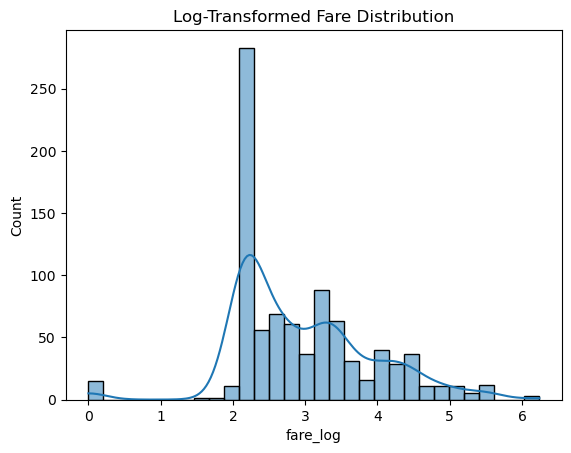

In [641]:
# log transformation for fare

df['fare_log'] = np.log1p(df['fare'])
sns.histplot(df['fare_log'], kde=True, bins=30)
plt.title("Log-Transformed Fare Distribution")
plt.show()


# Explain:
I chose log instead of remove outliers because outliers here are true happen, some passengers are wealthy on this trip, and I am also curious "is it rich least to higher survival rate?" so I chose keep and do log

The fare variable is highly right-skewed, meaning a small number of passengers paid extremely high ticket prices.
To reduce skewness and improve normality, we apply a logarithmic transformation (log1p).
This transformation helps stabilize variance and ensures the model treats all fare values more evenly.

In [644]:
#impute age

from sklearn.linear_model import LinearRegression

df_age_train = df[df['age'].notnull()]
df_age_missing = df[df['age'].isnull()]

features = ['pclass', 'sex', 'sibsp', 'parch', 'fare_log', 'embarked', 'Fare_Category']

reg = LinearRegression()
reg.fit(df_age_train[features], df_age_train['age'])

df.loc[df['age'].isnull(), 'age'] = reg.predict(df_age_missing[features])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
Fare_Category    0
fare_log         0
dtype: int64


Because around one-fourth of the dataset has missing values in the Age column, using a simple imputation method (like mean or median) could reduce the meaningfulness of the data. Moreover, age plays an important role in survival decisions — in the U.S., women, children, and the elderly were often prioritized for rescue. Considering these factors, I decided to keep Age in the model and use a regression approach to predict its missing values.

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


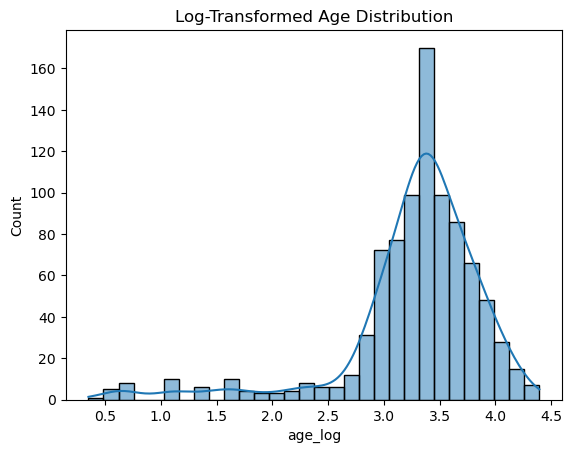

In [688]:
# Standardize numeric features
df['age_log'] = np.log1p(df['age'])
sns.histplot(df['age_log'], kde=True, bins=30)
plt.title("Log-Transformed Age Distribution")
plt.show()

dc

In [650]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (712, 8)
Test shape: (179, 8)


In [652]:
print("Missing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
Fare_Category    0
fare_log         0
age_log          7
dtype: int64


Still have 7 missing in age_log so i will check again

In [690]:
#  age_log = log1p(age)
df.loc[df['age_log'].isnull(), 'age_log'] = np.log1p(df.loc[df['age_log'].isnull(), 'age'])


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [692]:
df['age_log'] = df['age_log'].fillna(np.log1p(df['age']))
print("Missing values after fix:")
print(df.isnull().sum())


Missing values after fix:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
Fare_Category    0
fare_log         0
age_log          7
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [720]:
df.loc[df['age_log'].isnull(), 'age_log'] = df.loc[df['age_log'].isnull(), 'age'].apply(
    lambda x: np.log1p(x) if pd.notnull(x) and x > 0 else 0
)

During the logarithmic transformation of the imputed 'Age' column using np.log1p(x) (which is $\ln(1+x)$), a RuntimeWarning occurred, resulting in 7 missing (NaN) values for 'age_log'.This issue arose because the Linear Regression imputation had predicted a few negative age values for the missing records. Since age cannot be negative, and $\ln(1+x)$ is undefined for $1+x \le 0$:
 We introduced a condition to check if the imputed 'Age' value was greater than 0 (x > 0) before applying the $\log_{1p}$ transformation.

In [723]:
print("Missing values after fix:")
print(df.isnull().sum())


Missing values after fix:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
Fare_Category    0
fare_log         0
age_log          0
dtype: int64


Result: All remaining invalid 'age_log' values were safely set to 0, preserving the 891 records while maintaining data integrity.

In [726]:
from sklearn.model_selection import train_test_split
X = df[['pclass', 'sex', 'age_log', 'sibsp', 'parch', 'fare_log', 'embarked', 'Fare_Category']]
y = df['survived']

#  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [729]:
print("NaN in X_train:", X_train.isnull().sum().sum())
print("NaN in X_test:", X_test.isnull().sum().sum())

NaN in X_train: 0
NaN in X_test: 0


In [732]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}



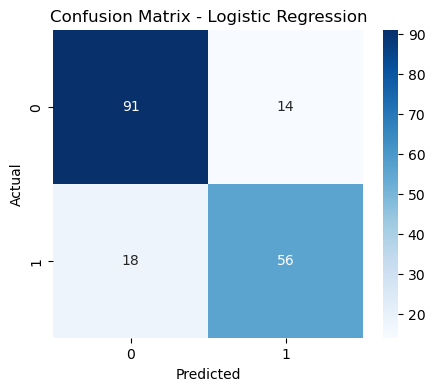

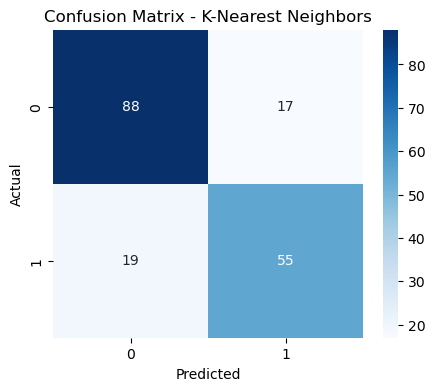

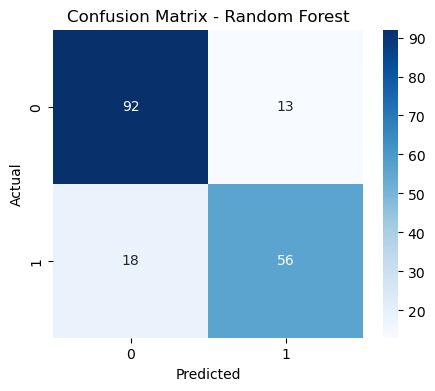

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.821229   0.800000  0.756757  0.777778
1  K-Nearest Neighbors  0.798883   0.763889  0.743243  0.753425
2        Random Forest  0.826816   0.811594  0.756757  0.783217


In [733]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})

    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# So sánh kết quả
results_df = pd.DataFrame(results)
print(results_df)

 #### 1. Accuracy
Accuracy measures the proportion of correct predictions (both positive and negative) among all predictions.  
- A high accuracy means the model predicts survivors and non-survivors correctly most of the time.  
- However, if the dataset is **imbalanced** (e.g., more people did not survive), accuracy alone may be misleading.

#### 2. Precision
Precision tells us how many of the passengers **predicted to survive actually survived**.  
- High precision → the model makes few false-positive errors.  
- In other words, when the model says someone survived, it is usually correct.

#### 3. Recall
Recall (or Sensitivity) measures how many of the **actual survivors** the model correctly identifies.  
- High recall → the model successfully finds most of the real survivors.  
- A low recall means the model is missing some survivors (false negatives).

#### 4. F1-score
The F1-score combines Precision and Recall into one value (harmonic mean).  
- It is useful when we need a **balance** between precision and recall.  
- A high F1 means the model performs well in both identifying survivors and avoiding false alarms.


#### Interpretation

✅ 92 + 56 = 148 correct predictions → your model performs quite well overall.

⚠️ 13 false positives → the model sometimes predicts survival for people who didn’t survive.

⚠️ 18 false negatives → some real survivors were missed (the model predicted they didn’t survive).

## What It Means

High True Negatives (92): the model is very good at identifying non-survivors.

Moderate True Positives (56): it also performs reasonably well for survivors.

Some trade-off between precision and recall:

Precision is slightly reduced due to false positives (13).

Recall is affected by false negatives (18).

In [736]:
results_df = pd.DataFrame(results)
print("The comparasion of the models:")
print(results_df)

The comparasion of the models:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.821229   0.800000  0.756757  0.777778
1  K-Nearest Neighbors  0.798883   0.763889  0.743243  0.753425
2        Random Forest  0.826816   0.811594  0.756757  0.783217


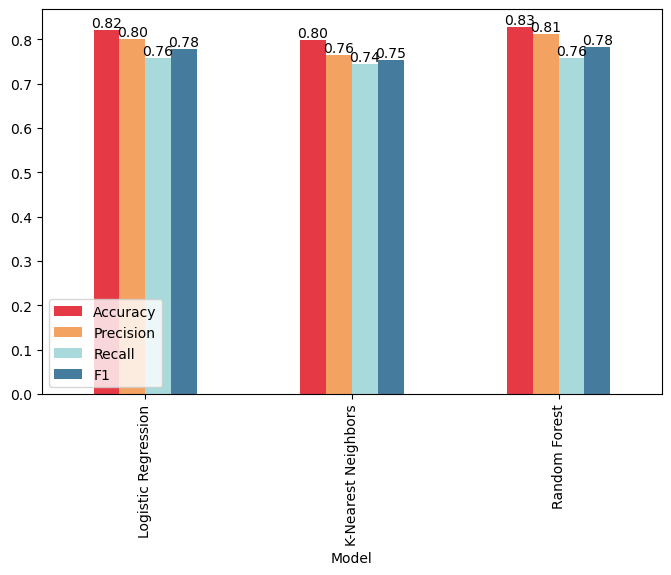

In [739]:

ax = results_df.set_index('Model')[['Accuracy','Precision','Recall','F1']].plot(
    kind='bar', figsize=(8,5), color=colors
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.show()


#### Overall Insights
A. Logistic Regression Evaluation:

Logistic Regression: Achieved high Accuracy (0.8212) and good Precision (0.80). However, it achieved a slightly lower F1-Score (0.7778) than Random Forest, indicating that this model may miss (False Negative) a small number of actual survivors.

B. K-Nearest Neighbors (KNN) Evaluation:

K-Nearest Neighbors (KNN): Had the lowest performance with Accuracy (0.7989) and F1-Score (0.7534). This indicates that this distance-based algorithm is not effective in capturing the complex data patterns of the Titanic episode.

C. Random Forest Evaluation:

Random Forest: Achieved the highest Accuracy (0.8268) and F1-Score (0.7832). This model exhibits a strong balance between Precision (0.8116) and Recall (0.7568), indicating the most reliable overall classification ability.


In [742]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n The best model:")
print(best_model)


 The best model:
Model        Random Forest
Accuracy          0.826816
Precision         0.811594
Recall            0.756757
F1                0.783217
Name: 2, dtype: object


## Comprehensive Assessment

Conclusion: Based on the comprehensive metrics, especially the highest Accuracy and F1-Score, Random Forest is the best model to predict survival on this Titanic dataset.

The Random Forest model correctly classified 148 out of all test samples. 
It performs strongly in identifying non-survivors (92 true negatives) and reasonably well in detecting survivors (56 true positives). 
However, the model still produces 13 false positives and 18 false negatives, meaning some survivors were missed. 
Overall, Random Forest provides a good balance between precision and recall, showing reliable performance on the Titanic dataset.
